In [1]:
import torch
from ultralytics import YOLO

device = torch.accelerator.current_accelerator().type

model = YOLO("yolo11n.pt")

In [ ]:
# model.model.nc = 82

In [2]:
# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="coco8.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=device
)

# Evaluate the model's performance on the validation set
metrics = model.val()

# Perform object detection on an image

Ultralytics 8.3.237 🚀 Python-3.13.5 torch-2.9.1 MPS (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, 

In [9]:
results = model("windows.webp")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
# path = model.export(format="onnx")  # Returns the path to the exported model


image 1/1 /Users/arvinalvandi/Desktop/YOLO/windows.webp: 640x384 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 384)


In [5]:
# Assuming 'results' is your Results object
boxes = results[0].boxes

if boxes is not None:
    # Get all detection data
    xyxy = boxes.xyxy  # Bounding boxes in [x1, y1, x2, y2] format
    conf = boxes.conf  # Confidence scores
    cls = boxes.cls    # Class IDs
    
    # Convert to numpy/cpu if needed
    xyxy = xyxy.cpu().numpy() if hasattr(xyxy, 'cpu') else xyxy
    conf = conf.cpu().numpy() if hasattr(conf, 'cpu') else conf
    cls = cls.cpu().numpy() if hasattr(cls, 'cpu') else cls
    
    # Print all detections
    print(f"Number of detections: {len(xyxy)}")
    print("-" * 50)
    
    for i in range(len(xyxy)):
        class_id = int(cls[i])
        class_name = results[0].names[class_id]
        confidence = float(conf[i])
        bbox = xyxy[i]
        
        print(f"Detection {i+1}:")
        print(f"  Class: {class_name} (ID: {class_id})")
        print(f"  Confidence: {confidence:.3f}")
        print(f"  Bounding Box: [{bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f}]")
        print(f"  Box Area: {(bbox[2]-bbox[0])*(bbox[3]-bbox[1]):.1f} pixels")
        print()

Number of detections: 2
--------------------------------------------------
Detection 1:
  Class: laptop (ID: 63)
  Confidence: 0.948
  Bounding Box: [180.7, 59.8, 760.1, 561.2]
  Box Area: 290563.8 pixels

Detection 2:
  Class: laptop (ID: 63)
  Confidence: 0.286
  Bounding Box: [24.2, 300.6, 259.0, 457.5]
  Box Area: 36843.3 pixels



In [6]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt

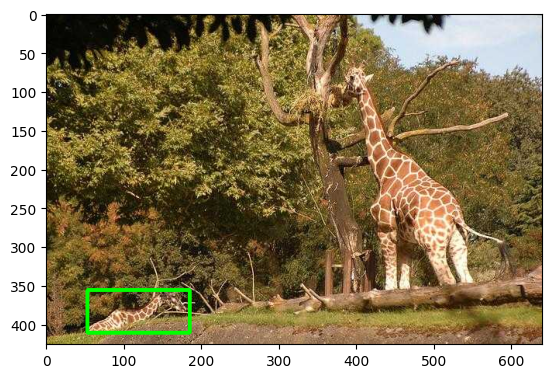

In [30]:
img = cv2.imread('datasets/coco8/images/train/000000000025.jpg', cv2.IMREAD_COLOR_RGB)

x_center = 0.185977
y_center = 0.901608

width, height = 0.206297, 0.129554 

img_height, img_width = img.shape[:2]


x_center = int(x_center * img_width)
y_center = int(y_center * img_height)
width = int(width * img_width)
height = int(height * img_height)

x1 = int(x_center - width/2)
y1 = int(y_center - height/2)

x2 = int(x_center + width/2)
y2= int(y_center + height/2)


cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(img);

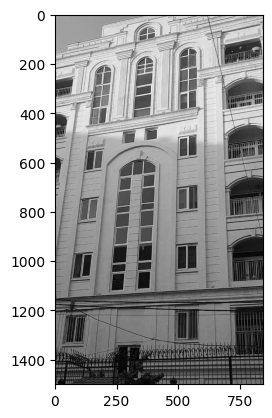

In [2]:
window_img = cv2.imread("windows.webp", cv2.IMREAD_GRAYSCALE)
plt.imshow(window_img, cmap='gray');

In [ ]:
blur

array([[160, 160, 160, ..., 160, 134, 120],
       [160, 160, 160, ...,  97, 103, 114],
       [160, 160, 160, ..., 120, 124, 135],
       ...,
       [102, 100,  57, ..., 114, 114, 114],
       [107,  95,  52, ..., 114, 114, 114],
       [110,  92,  49, ..., 114, 114, 114]],
      shape=(1500, 844), dtype=uint8)